In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Análise sobre a base de passageiros do Titanic
## Introdução
Tal relatório trata da avaliação dos dados de passageiros que embarcaram no trágico naufrágio do navio Titanic. Com eles, espera-se entender quais fatores foram mais importantes para a sobrevivência dos passageiros. Inicialmente os dados serão organizados e limpos, garantindo informações mais confiáveis. Num segundo momento serão apresentadas as questões a serem avaliadas, como apresentação, cada questão será tratada com uma análise quantitativa e qualitativa. Abaixo de cada questão serão apresentadas informações tabeladas e em forma de gráficos. Como encerramento, o relatório apresentará uma conclusão final.

## Limpeza dos dados

In [2]:
# Por convenção, todo dataframe criado a partir do "df_titanic" 
#constará como "dfaux_questao"e toda Série terá o prefixo "sr_".
#=========================
#criando o dataframe
df_titanic = pd.read_csv("titanic-data-6.csv", index_col="PassengerId")
#removendo as colunas ticket e name
df_titanic = df_titanic.drop(['Ticket','Cabin'], axis=1)

#preenchendo dados faltantes com a média de idades
mean_ages = df_titanic['Age'].mean()
df_titanic['Age'].fillna(mean_ages, inplace=True)

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


## Levantamento de questões

### Qual a porcentagem de sobreviventes por classe econômica (Survival x Pclass)?
Neste ponto, queremos observar o impacto que a classe econômica teve para o número de sobreviventes do desastre.

#### Tabelas e Dados

In [3]:
#armazenando o total de passageiros por classe
ser_total_pclass = df_titanic.groupby(['Pclass'])['Survived'].count()

In [4]:
#criando tabela de apoio para relcionar sobreviventes com a classse econoômica
dfaux_survived_pclass = df_titanic.groupby(['Survived','Pclass'])['Name'].count()

#calculando a porcentagem de sobreviventes com base no total por classe
pclass1_survived = (dfaux_survived_pclass[1][1]/ser_total_pclass[1])*100
pclass2_survived = (dfaux_survived_pclass[1][2]/ser_total_pclass[2])*100
pclass3_survived = (dfaux_survived_pclass[1][3]/ser_total_pclass[3])*100

#lista com a porcentagem de sobreviventes de acordo com a quantidade de passageiros da classe
ls_survived_percent_pclass = [pclass1_survived,pclass2_survived,pclass3_survived]

#calculando a porcentagem de sobreviventes com base no total de passageiros
total_pass = df_titanic['Survived'].count()

ls_survived_percent_pclass_total = [(dfaux_survived_pclass[1][1]/total_pass)*100,
                                    (dfaux_survived_pclass[1][2]/total_pass)*100,
                                    (dfaux_survived_pclass[1][3]/total_pass)*100]
print("Porcentagm de sobreviventes com base no total de passageiros na classe 1: " 
      + str(ls_survived_percent_pclass[0]))
print("Porcentagm de sobreviventes com base no total de passageiros na classe 2: " 
      + str(ls_survived_percent_pclass[1]))
print("Porcentagm de sobreviventes com base no total de passageiros na classe 3: " 
      + str(ls_survived_percent_pclass[2]))
print("=====")
print("Porcentagm de sobreviventes com base no total de passageiros na embarcação na classe 1: " 
      + str(ls_survived_percent_pclass_total[0]))
print("Porcentagm de sobreviventes com base no total de passageiros na embarcação na classe 2: " 
      + str(ls_survived_percent_pclass_total[1]))
print("Porcentagm de sobreviventes com base no total de passageiros na embarcação na classe 3: " 
      + str(ls_survived_percent_pclass_total[2]))

Porcentagm de sobreviventes com base no total de passageiros na classe 1: 62.96296296296296
Porcentagm de sobreviventes com base no total de passageiros na classe 2: 47.28260869565217
Porcentagm de sobreviventes com base no total de passageiros na classe 3: 24.236252545824847
=====
Porcentagm de sobreviventes com base no total de passageiros na embarcação na classe 1: 15.26374859708193
Porcentagm de sobreviventes com base no total de passageiros na embarcação na classe 2: 9.764309764309765
Porcentagm de sobreviventes com base no total de passageiros na embarcação na classe 3: 13.35578002244669


#### Gráficos

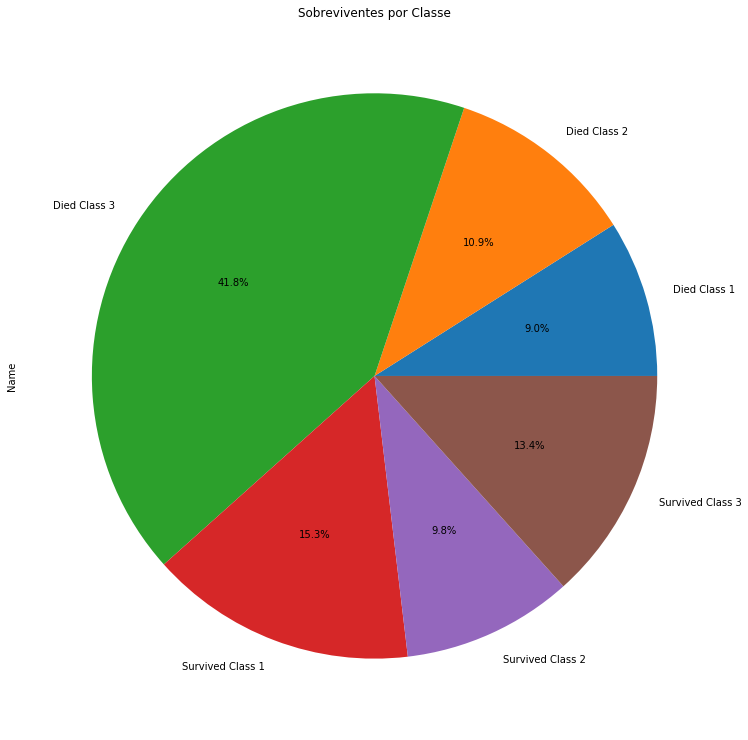

In [5]:
#criação de um conjunto de labels para melhor identificação do gráfico
labels = ['Died Class 1', 'Died Class 2', 'Died Class 3', 'Survived Class 1', 
          'Survived Class 2', 'Survived Class 3']
#geração do gráfico de pizza relacionando os sobreviventes por classe
dfaux_survived_pclass.plot(kind='pie', labels=labels,autopct='%1.1f%%',figsize=(13,13), 
                           title="Sobreviventes por Classe");

### Conclusão
Com base nos dados acima, observamos que o número de mortes na terceira classe equivale a maior porcentagem. Com isto, pode-se inferir duas possíveis causas: uma maior priorização para os passageiros de primeira classe no momento do resgate, ou, a posição onde ficavam localizados os passageiros da terceira classe ter sido um fator dificultador para que os mesmos chegassem a algum local seguro. 

### Qual a porcentagem de sobreviventes por faixa etária (Survival x Age)?
Neste estudo, será feita uma breve análise sobre o impacto da idade na taxa de sobrevivência observada.

#### Tabelas e Dados

In [6]:
#divisão da faixa etária
age_numbers = [0,9,19,59,100]
#classificação das faixas etárias
age_groups = ['Criança','Jovem','Adulto','Idoso']
#inclusão da coluna "Age_groups", dividindo a base com as faixas criadas
df_titanic['Age_groups'] = pd.cut(df_titanic['Age'], age_numbers, labels=age_groups)
#dataframe auxiliar para levantamento das porcentagens de sobreviventes e mortes
dfaux_age_total = df_titanic.groupby(['Age_groups']).agg({'Survived':'count'})
#Renomeando coluna para indicar o total de passageiros por faixa etária
dfaux_age_total.rename(inplace=True,columns={'Survived':'Total'})
#Criando coluna para o total de sobreviventes
dfaux_age_total['Total_survived'] = df_titanic.groupby(['Survived','Age_groups'])['Survived'].count()[1]
#criando coluna para o total de mortes
dfaux_age_total['Total_died'] = df_titanic.groupby(['Survived','Age_groups'])['Survived'].count()[0]
#criando coluna para a porcentagem de sobreviventes
dfaux_age_total['Percent_survived'] = dfaux_age_total['Total_survived']/dfaux_age_total['Total']*100 
#criando coluna para a porcentagem de mortes
dfaux_age_total['Percent_died'] = dfaux_age_total['Total_died']/dfaux_age_total['Total']*100 
#listando o dataframe auxiliar
dfaux_age_total.head()

,Total,Total_survived,Total_died,Percent_survived,Percent_died
Age_groups,,,,,
Criança,62,38,24,61.290323,38.709677
Jovem,102,41,61,40.196078,59.803922
Adulto,701,256,445,36.519258,63.480742
Idoso,26,7,19,26.923077,73.076923


#### Gráficos

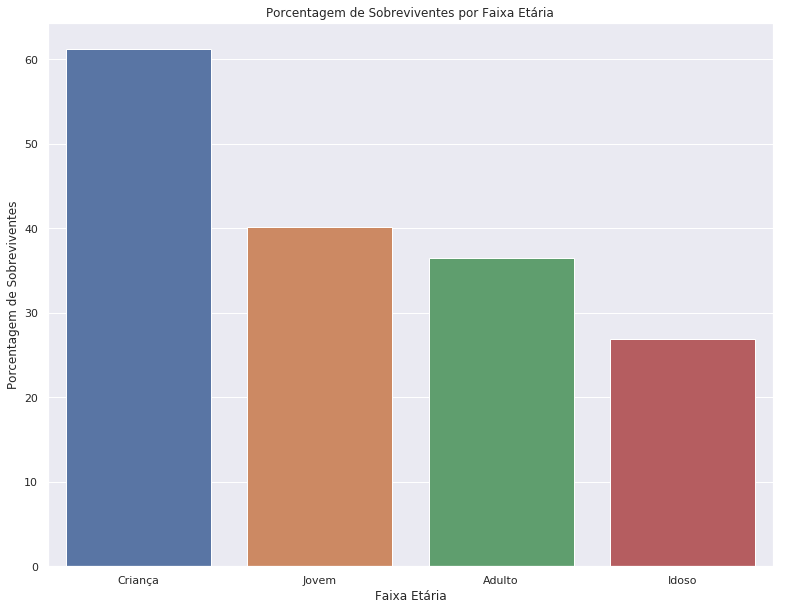

In [7]:
#configurações para exibição do gráfico de barras
sns.set(rc={'figure.figsize':(13,10)})
ax = sns.barplot(x=dfaux_age_total.index, y="Percent_survived", data=dfaux_age_total)
ax.set(xlabel='Faixa Etária', ylabel='Porcentagem de Sobreviventes');
plt.title("Porcentagem de Sobreviventes por Faixa Etária");

### Conclusão
Observando os dados, fica claro que no momento do salvamento foram priorizadas as crianças (faixa etária de 0 a 9 anos), em segundo momento jovens (10 a 19 anos) e por último adultos e idosos. 

### Qual a quantidade de sobreviventes por sexo (Survived x Sex)?
Até o momento, temos parte do perfil de sobreviventes da tragédia: crianças entre 0 e 9 anos e passageiros de primeira e segunda classe. Porém, uma investigação maior nos permitirá saber se o sexo dos passageiros teve influência neste indicador.

#### Tabelas e Dados

In [8]:
dfaux_survived_sex = df_titanic.groupby(['Sex','Survived']).agg({'Name': 'count'})
dfaux_survived_sex.rename(inplace=True,columns={'Name':'Total'})
dfaux_survived_sex

Total
Sex    Survived       
female 0            81
       1           233
male   0           468
       1           109

#### Gráficos

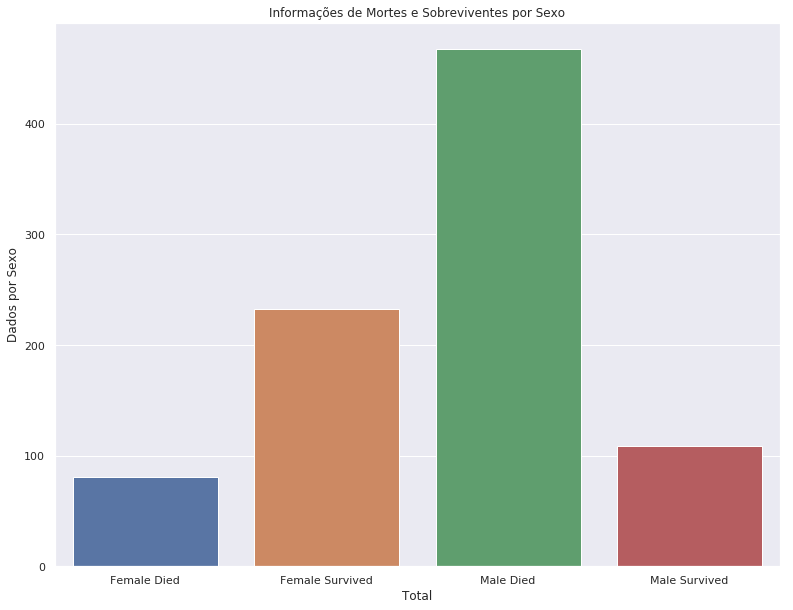

In [9]:
#configurações para exibição do gráfico de barras
label = ['Female Died','Female Survived','Male Died','Male Survived']
sns.set(rc={'figure.figsize':(13,10)})
ax = sns.barplot(x=dfaux_survived_sex.index, y="Total", data=dfaux_survived_sex)
ax.set(xlabel='Total', ylabel='Dados por Sexo');
plt.title("Informações de Mortes e Sobreviventes por Sexo")
plt.xticks(np.arange(4), label);

### Conclusão
Nesta última análise identificamos que o número de mulheres sobreviventes foi muito superior ao número de homens. Desta forma, é possível inferir que no momento dos resgates houve prioridade este perfil de passageiros.

## Conclusão Final
Nesta breve análise sobre o desastre com o navio Titanic, foi possível traçar um perfil básico para os sobreviventes: passageiros de classes 1 e 2, crianças e do sexo feminino. Novos estudos como a influência da cabine na taxa de sobrevivência não puderam ser inferidos pela falta de informações. 
As análises tomadas para fins didáticos limitaram-se à estas variáveis por questões de tempo para execução, porém, análises relacionando a influência da quantidade de parentes embarcados, ou a faixa etária das mulheres sobreviventes são variáveis que enriquecerão as inferências em trabalhos futuros.
### Limitações da Análise
Sabe-se que o total de passagerios do desastre era maior do que 1300 pessoas. Porém, para análises estatísticas, uma amostra de 891 passageiros pode ser considerada um bom valor para validação das hipóteses apresentadas com um nível de confiança de 99% e uma margem de erro de 3%. 

## Bibliografia
* https://stackoverflow.com/
* https://matplotlib.org/
* https://seaborn.pydata.org/
* https://pt.surveymonkey.com/mp/sample-size-calculator/
